# Zdanie

Proszę pobrać dane breast-cancer oraz wybrać „1” kolumnę jako daną objaśnianą $y$ a wektory od „2” do „31” jako dane objaśniające.


In [6]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Zadanie 
Podziel dane z poprzedniego zadania na zbiór testowy i treningowy.

In [11]:
from sklearn.cross_validation import train_test_split


# Zadanie

Wykonaj na teście trzy kroki 
  * StandardScaler()
  * PCA(n_components=2)
  * LogisticRegression(random_state=1))
  
za pomocą jednego Pipeline. 

Wykonaj na teście trzy kroki 
  * StandardScaler()
  * PCA(n_components=2)
  * SVC()
  
za pomocą jednego Pipeline. 

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [12]:
pipe_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))])
pipe_1.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_1.score(X_test, y_test))

Test Accuracy: 0.947


Test Accuracy: 0.956


# Zadanie 

Wykonaj na zbiorze treningowym 
  * StratifiedKFold
  
Dla każdego folda naucz zbiór na zbiorze dopełnień i waliduj na foldzie. Wypisz wyniki.


In [13]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)

In [15]:
scores = []
for k, (train, test) in enumerate(kfold):
    pass

# Zadanie 

Wykonaj wykres, który w zależności od ilości wziętych punktów pokarze wynik nauczonego algorytmu na danych testowych i treningowych.

Możesz użyć funkcji 
```python
learning_curve
```

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


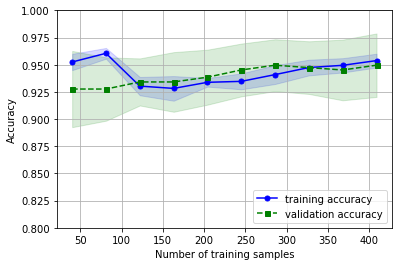

In [10]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_1, X=X_train, y=y_train, 
                                                           train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


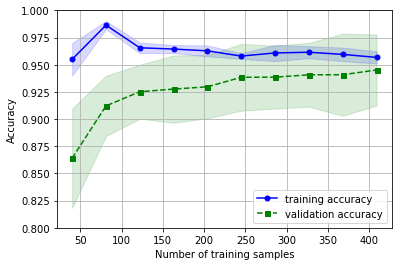

# Zadanie 

Wykonaj wykres, który w zależności od paramtru $C$ w Regresji Logistycznej pokarze wynik nauczonego algorytmu na danych testowych i treningowych.

Możesz użyć funkcji 
```python
validation_curve
```

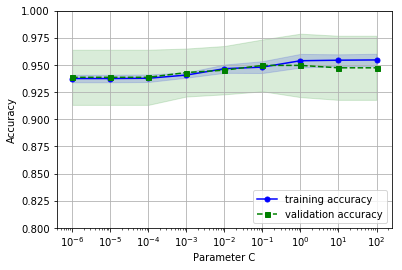

In [12]:
from sklearn.learning_curve import validation_curve
param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve( estimator=pipe_1, X=X_train,
                                             y=y_train, param_name='clf__C',
                                             param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


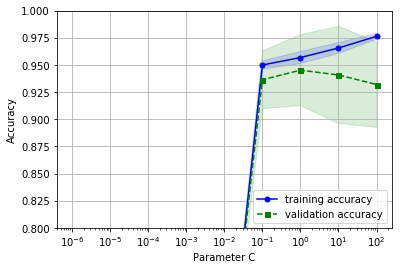

# Zadanie

Znajdź optymalne parametry dla modelu zdefiniowanego a pomocą 
```python
Pipeline
```


In [20]:
from sklearn.grid_search import GridSearchCV 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range}]
gs = GridSearchCV(estimator=pipe_1, param_grid=param_grid, 
                  scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9494505494505494
{'clf__C': 0.1}


In [25]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.956


In [ ]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']}, 
              {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

print(gs.best_score_)
print(gs.best_params_)

In [ ]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

# Zadanie
Wykonaj podwujną cross-validation (nested cross-validation) dla dwuch wybranych metod na zbiorze breast-cancer aby je porównać.

In [24]:
from sklearn.cross_validation import cross_val_score

gs = GridSearchCV(estimator=pipe_1, param_grid=param_grid, scoring='accuracy',
                  cv=10, n_jobs=-1)
scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.951 +/- 0.016


# Zadanie
Proszę narysować krzywą ROC dla naszych przykładów.

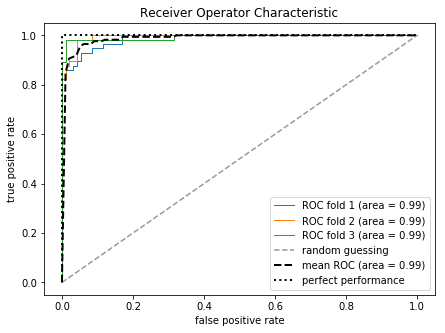

In [14]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_1.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    


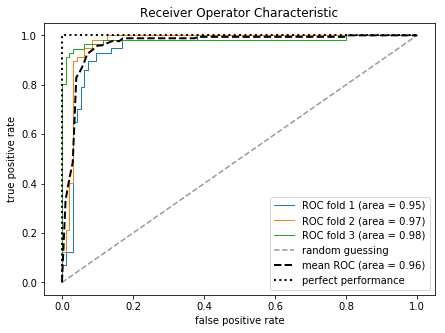

# Zadanie

Wypisz ROC AUC:

In [18]:
pipe_1 = pipe_1.fit(X_train, y_train)
y_pred2 = pipe_1.predict(X_test)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.945
Accuracy: 0.956


ROC AUC: 0.950
Accuracy: 0.956
